# A Starter Recipe

This notebook is designed to provide similar code and output that is observed in the R notebook.

## Package Requirements

In [1]:
# general helper libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# dataset used
from tensorflow.keras.datasets import mnist

# deep learning functionality
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# model results analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape  == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape  == (10000,)

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

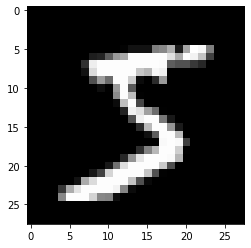

In [4]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.show()

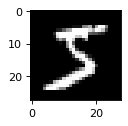

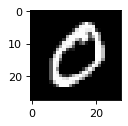

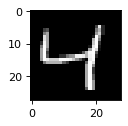

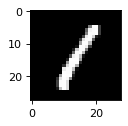

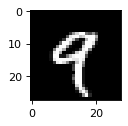

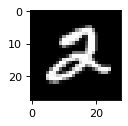

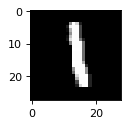

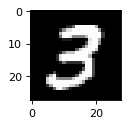

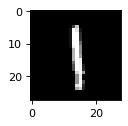

In [5]:
for i in range(9):  
    plt.figure(figsize=(1.5, 1.5), dpi=80)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

## Prepare Data

### Shape into proper tensor form

In [6]:
# reshape features
train_images = x_train.reshape((60000, 28*28))
test_images = x_test.reshape((10000, 28*28))

# reshape response variable
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

### Stabilize learning by data scaling

In [7]:
# standardize train and test features
train_images = train_images / 255
test_images = test_images / 255

### Randomize data

In [8]:
random.seed(123)
randomize = random.sample(range(0, x_train.shape[0]), x_train.shape[0])
train_images = train_images[randomize]
train_labels = train_labels[randomize]

## Balance Batch Size & Default Learning Rate

In [9]:
# get number of features
n_feat = train_images.shape[1]

# 1. Define model architecture
model = Sequential()
model.add(Dense(units=512, input_dim=n_feat, activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))

# 2. Define how our model is going to learn
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


2021-10-27 09:34:21.575327: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# fit the model
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10


2021-10-27 09:34:21.802995: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1500/1500 [==============================] - 4s 2ms/step - loss: 0.6669 - accuracy: 0.8429 - val_loss: 0.3841 - val_accuracy: 0.8972
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3458 - accuracy: 0.9048 - val_loss: 0.3099 - val_accuracy: 0.9127
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.9170 - val_loss: 0.2767 - val_accuracy: 0.9218
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2657 - accuracy: 0.9257 - val_loss: 0.2506 - val_accuracy: 0.9283
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2429 - accuracy: 0.9330 - val_loss: 0.2332 - val_accuracy: 0.9332
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2239 - accuracy: 0.9384 - val_loss: 0.2153 - val_accuracy: 0.9384
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2077 - accuracy: 0.9426 - val_loss: 0.2019 - val_accuracy: 0.9423
Epo

<AxesSubplot:>

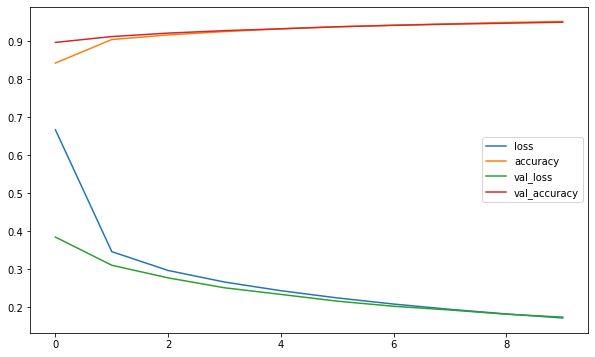

In [11]:
pd.DataFrame(history.history).plot(figsize=(10,6))

## Pick an Adaptive Learning Rate Optimizer

In [12]:
# 1. Define model architecture
model = Sequential()
model.add(Dense(units=512, input_dim=n_feat, activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))

# 2. Define how our model is going to learn --> using RMSprop
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

# fit the model
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2202 - accuracy: 0.9345 - val_loss: 0.1198 - val_accuracy: 0.9635
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0972 - accuracy: 0.9721 - val_loss: 0.0985 - val_accuracy: 0.9722
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0669 - accuracy: 0.9803 - val_loss: 0.0974 - val_accuracy: 0.9743
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0524 - accuracy: 0.9851 - val_loss: 0.0994 - val_accuracy: 0.9740
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0416 - accuracy: 0.9886 - val_loss: 0.1066 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0325 - accuracy: 0.9910 - val_loss: 0.1127 - val_accuracy: 0.9760
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0259 - accuracy: 0.9928 - val_loss: 0.1330 - val_accuracy:

<AxesSubplot:>

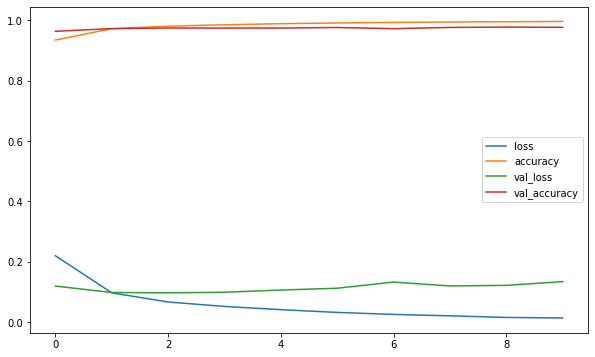

In [13]:
pd.DataFrame(history.history).plot(figsize=(10,6))

## Add Callbacks

### Stop training at the right time

In [14]:
# 1. Define model architecture
model = Sequential()
model.add(Dense(units=512, input_dim=n_feat, activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))

# 2. Define how our model is going to learn --> using RMSprop
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

# fit the model and include early stopping
history = model.fit(
    train_images, 
    train_labels, 
    batch_size=32, 
    epochs=20, 
    validation_split=0.2,
    callbacks=EarlyStopping(patience=3, min_delta=0.0001, restore_best_weights=True)
)

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2217 - accuracy: 0.9351 - val_loss: 0.1320 - val_accuracy: 0.9617
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0975 - accuracy: 0.9719 - val_loss: 0.1168 - val_accuracy: 0.9652
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0673 - accuracy: 0.9808 - val_loss: 0.1052 - val_accuracy: 0.9716
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0527 - accuracy: 0.9856 - val_loss: 0.0951 - val_accuracy: 0.9749
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0398 - accuracy: 0.9887 - val_loss: 0.1175 - val_accuracy: 0.9724
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0319 - accuracy: 0.9910 - val_loss: 0.1110 - val_accuracy: 0.9742
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0259 - accuracy: 0.9929 - val_loss: 0.1091 - val_accuracy:

### Add a learning rate scheduler

In [15]:
# 1. Define model architecture
model = Sequential()
model.add(Dense(units=512, input_dim=n_feat, activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))

# 2. Define how our model is going to learn --> using RMSprop
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

# fit the model and include early stopping and learning rate reductions
history = model.fit(
    train_images, 
    train_labels, 
    batch_size=32, 
    epochs=20, 
    validation_split=0.2,
    callbacks=[
        EarlyStopping(patience=3, min_delta=0.0001, restore_best_weights=True),
        ReduceLROnPlateau(patience=1, factor=0.1)
    ]
)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2248 - accuracy: 0.9337 - val_loss: 0.1297 - val_accuracy: 0.9595
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0969 - accuracy: 0.9715 - val_loss: 0.1055 - val_accuracy: 0.9706
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0685 - accuracy: 0.9806 - val_loss: 0.0931 - val_accuracy: 0.9754
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0535 - accuracy: 0.9846 - val_loss: 0.0963 - val_accuracy: 0.9759
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0233 - accuracy: 0.9939 - val_loss: 0.0838 - val_accuracy: 0.9793
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0191 - accuracy: 0.9951 - val_loss: 0.0844 - val_accuracy: 0.9790
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.0835 - val_accuracy:

In [16]:
# progression of learning rate over the above epochs
history.history['lr']

[0.001,
 0.001,
 0.001,
 0.001,
 0.000100000005,
 0.000100000005,
 1.0000001e-05,
 1.0000001e-05,
 1.0000001e-06,
 1.0000001e-07]

## Explore Model Capacity

In [17]:
def train_model(n_units, n_layers=1):
    
    
    # Create a model with a single hidden input layer
    model = Sequential()
    model.add(Dense(units=n_units, input_dim=n_feat, activation = 'relu'))
    
    # Add additional hidden layers based on input
    if n_layers > 1:
        for layer in range(n_layers):
            model.add(Dense(units=n_units, input_dim=n_feat, activation = 'relu'))
    
    # Add final output layer
    model.add(Dense(units=10, activation='softmax'))
    
    # compile model
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=SGD(learning_rate=0.01, momentum=0.5), 
        metrics='accuracy'
    )
    
    # train model
    history = model.fit(
        train_images, 
        train_labels, 
        batch_size=32, 
        epochs=20, 
        validation_split=0.2,
        callbacks=[
            EarlyStopping(patience=3, min_delta=0.0001, restore_best_weights=True),
            ReduceLROnPlateau(patience=1, factor=0.1)
        ],
        verbose=False
    )
    
    return history   

In [18]:
# train model with 2 layers and 128 units in each layer
example_model = train_model(n_units=128, n_layers=2)

In [19]:
def get_results(model_history):
    min_val_loss = min(model_history.history['val_loss'])
    min_val_loss_idx = model_history.history['val_loss'].index(min_val_loss)
    related_acc = model_history.history['val_accuracy'][min_val_loss_idx]
    return f'val_loss: {round(min_val_loss, 3)}, val_acc: {round(related_acc, 3)}'

In [20]:
get_results(example_model)

'val_loss: 0.101, val_acc: 0.968'

In [21]:
grid = pd.DataFrame({
    'units': np.repeat([128, 256, 512, 1024], 3),
    'layers': np.tile(np.array([1, 2, 3]), 4)
})

def create_id(units, layers):
    return f"mlp_{layers}_layers_{units}_units"

grid['id'] = [create_id(units, layers) for units, layers in zip(grid['units'], grid['layers'])]
grid

,units,layers,id
0,128,1,mlp_1_layers_128_units
1,128,2,mlp_2_layers_128_units
2,128,3,mlp_3_layers_128_units
3,256,1,mlp_1_layers_256_units
4,256,2,mlp_2_layers_256_units
5,256,3,mlp_3_layers_256_units
6,512,1,mlp_1_layers_512_units
7,512,2,mlp_2_layers_512_units
8,512,3,mlp_3_layers_512_units
9,1024,1,mlp_1_layers_1024_units


In [22]:
for row, items in grid.iterrows():
    history = train_model(n_units=items['units'], n_layers=items['layers'])
    results = get_results(history)
    print(f"{items['id']}: {results}")

mlp_1_layers_128_units: val_loss: 0.099, val_acc: 0.97
mlp_2_layers_128_units: val_loss: 0.097, val_acc: 0.97
mlp_3_layers_128_units: val_loss: 0.085, val_acc: 0.973
mlp_1_layers_256_units: val_loss: 0.097, val_acc: 0.971
mlp_2_layers_256_units: val_loss: 0.087, val_acc: 0.973
mlp_3_layers_256_units: val_loss: 0.086, val_acc: 0.974
mlp_1_layers_512_units: val_loss: 0.092, val_acc: 0.972
mlp_2_layers_512_units: val_loss: 0.078, val_acc: 0.976
mlp_3_layers_512_units: val_loss: 0.08, val_acc: 0.977
mlp_1_layers_1024_units: val_loss: 0.091, val_acc: 0.973
mlp_2_layers_1024_units: val_loss: 0.077, val_acc: 0.977
mlp_3_layers_1024_units: val_loss: 0.076, val_acc: 0.976


## Regularize Overfitting

### Weight decay

In [23]:
# 1. Define model architecture with L2 weight decay
model = Sequential()
model.add(Dense(
    units=512, 
    input_dim=n_feat, 
    activation = 'relu', 
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(Dense(
    units=512, 
    activation = 'relu', 
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(Dense(units=10, activation='softmax'))

# 2. Define how our model is going to learn --> using RMSprop
model.compile(
    loss='categorical_crossentropy', 
    optimizer='rmsprop',
    metrics='accuracy'
)

# fit the model and include early stopping
history = model.fit(
    train_images, 
    train_labels, 
    batch_size=32, 
    epochs=20, 
    validation_split=0.2,
    callbacks=EarlyStopping(patience=3, min_delta=0.0001, restore_best_weights=True)
)

Epoch 1/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4995 - accuracy: 0.9263 - val_loss: 0.2810 - val_accuracy: 0.9533
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2381 - accuracy: 0.9565 - val_loss: 0.2158 - val_accuracy: 0.9583
Epoch 3/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2001 - accuracy: 0.9618 - val_loss: 0.1934 - val_accuracy: 0.9609
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1815 - accuracy: 0.9658 - val_loss: 0.1861 - val_accuracy: 0.9622
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1714 - accuracy: 0.9667 - val_loss: 0.1750 - val_accuracy: 0.9643
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1618 - accuracy: 0.9691 - val_loss: 0.2202 - val_accuracy: 0.9503
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1602 - accuracy: 0.9680 - val_loss: 0.1717 - val_ac

### Dropout

In [ ]:
# 1. Define model architecture with dropout layers
model = Sequential()
model.add(Dense(units=512, input_dim=n_feat, activation = 'relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=512, activation = 'relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=10, activation='softmax'))

# 2. Define how our model is going to learn --> using RMSprop
model.compile(
    loss='categorical_crossentropy', 
    optimizer='rmsprop',
    metrics='accuracy'
)

# fit the model and include early stopping
history = model.fit(
    train_images, 
    train_labels, 
    batch_size=32, 
    epochs=20, 
    validation_split=0.2,
    callbacks=EarlyStopping(patience=3, min_delta=0.0001, restore_best_weights=True)
)

Epoch 1/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2632 - accuracy: 0.9228 - val_loss: 0.1303 - val_accuracy: 0.9638
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1485 - accuracy: 0.9622 - val_loss: 0.1227 - val_accuracy: 0.9715
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1344 - accuracy: 0.9681 - val_loss: 0.1258 - val_accuracy: 0.9713
Epoch 4/20
 192/1500 [==>...........................] - ETA: 9s - loss: 0.1052 - accuracy: 0.9740

## Evaluate results

In [ ]:
model.evaluate(test_images, test_labels)

### Confusion matrix

In [ ]:
predictions = model.predict(test_images)
pred_values = np.argmax(predictions, axis=1)
pred_values

In [ ]:
actual_values = y_test
actual_values

In [ ]:
cm = confusion_matrix(actual_values, pred_values)
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Visualize missed predictions

In [ ]:
missed_features = x_test[pred_values != actual_values]
missed_labels = pred_values[pred_values != actual_values]

In [ ]:
# first 10 missed predictions
for i in range(10):
    plt.figure(figsize=(2, 2), dpi=80)
    plt.imshow(missed_features[i], cmap=plt.get_cmap('gray'))
    plt.title(f'Predicted: {missed_labels[i]}')
    plt.show()